In [ ]:
import nltk
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px



# **Bi-gramas**


*   Parejas de palabras que ocurren consecutivas




In [ ]:
list(bigrams(text1))

In [4]:
md_bigrams = list(bigrams(text1))
fdist = FreqDist(md_bigrams)

Aqui podemos obtener los bi-gramas más frecuentes en este texto:

In [5]:
fdist.most_common(10)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

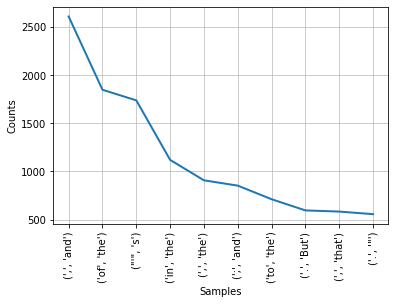

In [6]:
fdist.plot(10)


# Filtrado de bi-gramas


*   Sin embargo, observamos que los bi-gramas más comunes no representan frases o estructuras léxicas de interés.
*   Tal vez, aplicar algún tipo de filtro nos permita ver estructuras más relevantes.




In [10]:
threshold = 2
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])> threshold and len(bigram[1])> threshold]
filtered_bigrams[:10]


[('Moby', 'Dick'),
 ('Herman', 'Melville'),
 ('Melville', '1851'),
 ('Late', 'Consumptive'),
 ('Consumptive', 'Usher'),
 ('Grammar', 'School'),
 ('The', 'pale'),
 ('pale', 'Usher'),
 ('and', 'brain'),
 ('see', 'him')]

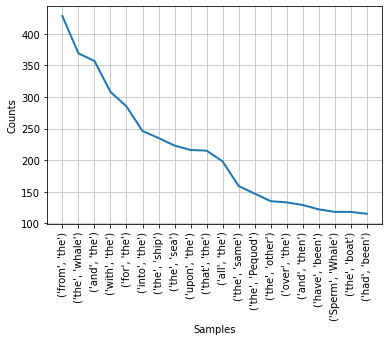

In [9]:
filtered_dist = FreqDist(filtered_bigrams)
filtered_dist.plot(20)

# Tri-gramas

In [12]:
from nltk.util import ngrams
md_trigrams = list(ngrams(text1, 3)) # 3 es trigrama
fdist = FreqDist(md_trigrams)
fdist.most_common(10)


[((',', 'and', 'the'), 187),
 (('don', "'", 't'), 103),
 (('of', 'the', 'whale'), 101),
 ((',', 'in', 'the'), 93),
 ((',', 'then', ','), 87),
 (('whale', "'", 's'), 81),
 (('.', 'It', 'was'), 81),
 (('ship', "'", 's'), 80),
 (('the', 'Sperm', 'Whale'), 77),
 ((',', 'as', 'if'), 76)]

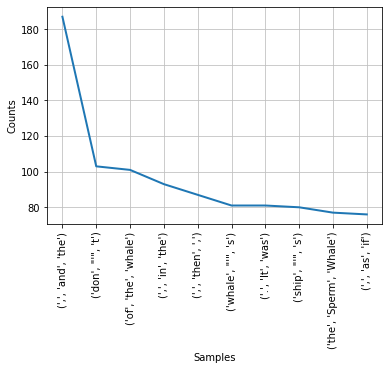

In [13]:
fdist.plot(10)

# Collocations(Colocaciones)


*   Son secuencias de palabras que suelen ocurrir ex textos o conversaciones con una frecuencia imusualmente alta NLTK.doc
*   Las colocaciones de una palabra son declaraciones formales de donde suele ubicarse esa palabra Manning & Schütze, 1990 Foundations of Statistical Natural Languaje Processing, Capitulo 6





In [56]:
md_bigrams = list(bigrams(text1))

threshold = 2
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])> threshold and len(bigram[1])> threshold]
filtered_bigram_dist = FreqDist(filtered_bigrams)

filtered_words = [word for word in text1 if len(word)>threshold]
filtered_word_dist = FreqDist(filtered_words)

df = pd.DataFrame()
df['bi_grams'] = list(set(filtered_bigrams))
df['word_0'] = df['bi_grams'].apply(lambda x: x[0])
df['word_1'] = df['bi_grams'].apply(lambda x: x[1])
df['bi_gram_freq'] = df['bi_grams'].apply(lambda x: filtered_bigram_dist[x] )
df['word_0_freq'] = df['word_0'].apply(lambda x: filtered_word_dist[x] )
df['word_1_freq'] = df['word_1'].apply(lambda x: filtered_word_dist[x] )


In [57]:
df

bi_grams      word_0       word_1  bi_gram_freq  \
0          (himself, should)     himself       should             1   
1       (comes, floundering)       comes  floundering             1   
2                (veer, not)        veer          not             1   
3               (that, rips)        that         rips             1   
4              (board, here)       board         here             1   
...                      ...         ...          ...           ...   
67937         (outlast, all)     outlast          all             1   
67938  (previously, secured)  previously      secured             1   
67939      (solitary, place)    solitary        place             1   
67940            (not, fear)         not         fear             1   
67941             (but, why)         but          why             1   

       word_0_freq  word_1_freq  
0              203          181  
1               52            3  
2                1         1103  
3             2982            1  
4               73          272  
...            ...          ...  
67937            2         1462  
67938           17           15  
67939           19          116  
67940         1103           32  
67941         1113           71  

[67942 rows x 6 columns]

# Pointwise Mutual Information (PMI)

Una métrica basada en teoría de la inforamción para encontrar Collocations.
$$
PMI = \log\left(\frac{P(w_1, w_2)}{P(w_1)P(w_2)}\right)
$$

In [64]:
df['PMI'] = df[['bi_gram_freq', 'word_0_freq', 'word_1_freq']].apply(lambda x: np.log2(x.values[0]/(x.values[1]*x.values[2])), axis = 1)
df['log(bi_gram_freq)'] = df['bi_gram_freq'].apply(lambda x: np.log2(x))

In [65]:
df

bi_grams      word_0       word_1  bi_gram_freq  \
0          (himself, should)     himself       should             1   
1       (comes, floundering)       comes  floundering             1   
2                (veer, not)        veer          not             1   
3               (that, rips)        that         rips             1   
4              (board, here)       board         here             1   
...                      ...         ...          ...           ...   
67937         (outlast, all)     outlast          all             1   
67938  (previously, secured)  previously      secured             1   
67939      (solitary, place)    solitary        place             1   
67940            (not, fear)         not         fear             1   
67941             (but, why)         but          why             1   

       word_0_freq  word_1_freq        PMI  log(bi_gram_freq)  
0              203          181 -15.165182                0.0  
1               52            3  -7.285402                0.0  
2                1         1103 -10.107217                0.0  
3             2982            1 -11.542065                0.0  
4               73          272 -14.277287                0.0  
...            ...          ...        ...                ...  
67937            2         1462 -11.513728                0.0  
67938           17           15  -7.994353                0.0  
67939           19          116 -11.105909                0.0  
67940         1103           32 -15.107217                0.0  
67941         1113           71 -16.269985                0.0  

[67942 rows x 8 columns]

In [66]:
df.sort_values(by = 'PMI', ascending = False)



bi_grams       word_0     word_1  bi_gram_freq  \
51520  (unmisgiving, hardihood)  unmisgiving  hardihood             1   
5425           (knob, slamming)         knob   slamming             1   
29600       (samphire, baskets)     samphire    baskets             1   
60149    (selectest, champions)    selectest  champions             1   
13284         (volatile, salts)     volatile      salts             1   
...                         ...          ...        ...           ...   
34520                (man, the)          man        the             1   
31733               (some, the)         some        the             1   
15197                (one, the)          one        the             1   
33211                (the, not)          the        not             1   
37455                (the, but)          the        but             1   

       word_0_freq  word_1_freq        PMI  log(bi_gram_freq)  
51520            1            1   0.000000                0.0  
5425             1            1   0.000000                0.0  
29600            1            1   0.000000                0.0  
60149            1            1   0.000000                0.0  
13284            1            1   0.000000                0.0  
...            ...          ...        ...                ...  
34520          508        13721 -22.732783                0.0  
31733          578        13721 -22.919024                0.0  
15197          889        13721 -23.540138                0.0  
33211        13721         1103 -23.851315                0.0  
37455        13721         1113 -23.864336                0.0  

[67942 rows x 8 columns]

In [71]:
fig = px.scatter(x = df['PMI'].values , y = df['log(bi_gram_freq)'], color = df['PMI'] + df['log(bi_gram_freq)'],
                 hover_name = df['bi_grams'].values, width = 600, height = 600, labels = {'x': 'PMI', 'y': 'Log(Bigram Frequecy)'})



In [72]:
fig.show()

# Medidas pre-construidas en NLTK



In [74]:
# ver documentación https://www.nltk.org/_modules/nltk/metrics/association.html

from nltk.collocations import *
bigram_measure = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(text1)


In [ ]:
finder.apply_freq_filter(20)
finder.nbest(bigram_measure.pmi,10)

# Textos en Español

In [77]:
# descargamos corpus en español  https://mailman.uib.no/public/corpora/2007-October/005448.html
nltk.download('cess_esp')
corpus = nltk.corpus.cess_esp.sents()
flatten_corpus = [w for l in corpus for w in l ]


[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


In [80]:
print(flatten_corpus[:30])

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation']


In [ ]:
finder = BigramCollocationFinder.from_documents(corpus)
finder.apply_freq_filter(10)
finder.nbest(bigram_measure.pmi, 10)